In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis
import rgRPA

import scipy.constants as cnt

import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
from matplotlib.lines import Line2D

## Summary

**[1. CPEB4 KH Testing](#1)**

**[2. CPEB4 RtoK](#2)**

**[3. HOOMD FUS Test](#3)**

**[4. Alpha helical of CPEB4](#4)**

**[5. HPS TEST](#5)**

### 1. CPEB4 KH Testing <a id='1'></a>

In [9]:
temperatures = np.linspace(300,450,8)
lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4',
                  host='@perdiu37',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4-H', 
                  save=50000,
                  t=int(1e9),
                  processors=2,
                  model='KH-HPS').write_hps_files()

lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4', 
                  save=50000,
                  t=int(1e9),
                  host='@perdiu38',
                  processors=2,
                  model='KH').write_hps_files()

╔════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/CPEB4-H for CPEB4     ║
║--------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                               ║
║       - Model = KH-HPS                                                                     ║
║       - Chains = 1                                                                         ║
║       - Ionic Strength (mM) = 0.1                                                          ║
║       - Medium Permittivity = 80.0                                                         ║
║       - Temperatures (K) = [300.         321.42857143 342.85714286 364.28571429 385.71428571
 407.14285714 428.57142857 450.        ]    ║
║       - HPS Scale = 1.0                                                                    ║
╚═══

In [92]:
hps_KH = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4-H')
true_KH = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4')

> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Taking frames every 1 for a total of 10000 to avoid strong correlations


<ErrorbarContainer object of 3 artists>

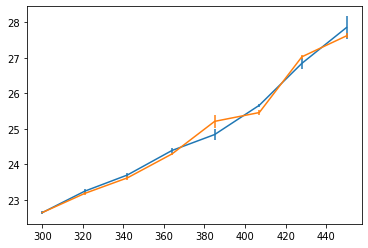

In [129]:
rg1 = hps_KH.rg()
rg_avg = []
err = []
for i,r in enumerate(rg1):
    err.append(analysis.Analysis(oliba_wd=None).block_error(observable=np.array([r]))[0])
    rg_avg.append(r.mean())

plt.errorbar(hps_KH.temperatures, rg_avg, yerr=err)

rg1 = true_KH.rg()
rg_avg = []
err = []
for i,r in enumerate(rg1):
    err.append(analysis.Analysis(oliba_wd=None).block_error(observable=np.array([r]))[0])
    rg_avg.append(r.mean())
    
plt.errorbar(true_KH.temperatures, rg_avg, yerr=err)

In [10]:
temperatures = np.linspace(300,450, 8)
lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4',
                  host='@perdiu39',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_D4-H', 
                  save=50000,
                  t=int(1e9),
                  processors=2,
                  model='KH-HPS').write_hps_files()

lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_D4', 
                  save=50000,
                  t=int(1e9),
                  host='@perdiu40',
                  processors=2,
                  model='KH').write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_D4-H for CPEB4     ║
║-----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                  ║
║       - Model = KH-HPS                                                                        ║
║       - Chains = 1                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                             ║
║       - Medium Permittivity = 80.0                                                            ║
║       - Temperatures (K) = [300.         321.42857143 342.85714286 364.28571429 385.71428571
 407.14285714 428.57142857 450.        ]    ║
║       - HPS Scale = 1.0                                                  

> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Taking frames every 1 for a total of 10000 to avoid strong correlations


<ErrorbarContainer object of 3 artists>

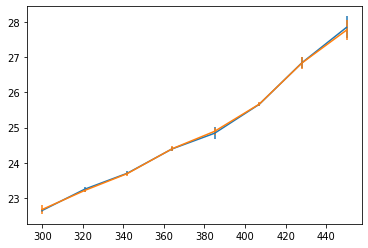

In [130]:
wt = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4-H')
d4 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_D4-H')

rg_wt = wt.rg()
rg_d4 = d4.rg()

rg_avg_wt = []
err_wt = []
rg_avg_d4 = []
err_d4 = []

for i,r in enumerate(rg_wt):
    err_wt.append(analysis.Analysis(oliba_wd=None).block_error(observable=np.array([r]))[0])
    rg_avg_wt.append(r.mean())
    

for i,r in enumerate(rg_d4):
    err_d4.append(analysis.Analysis(oliba_wd=None).block_error(observable=np.array([r]))[0])
    rg_avg_d4.append(r.mean())

plt.errorbar(wt.temperatures, rg_avg_wt, yerr=err_wt, label='WT')
plt.errorbar(d4.temperatures, rg_avg_d4, yerr=err_d4, label='D4')

### 2. CPEB4 RtoK <a id='2'></a>

In [145]:
temperatures = np.linspace(300,450, 6)
lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4_RtoK',
                  host='@perdiu32',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RtoK', 
                  save=50000,
                  t=int(1e9),
                  processors=2,
                  model='HPS').write_hps_files()

╔════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RtoK for CPEB4_RtoK     ║
║----------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                       ║
║       - Model = HPS                                                                                ║
║       - Chains = 1                                                                                 ║
║       - Ionic Strength (mM) = 0.1                                                                  ║
║       - Medium Permittivity = 80.0                                                                 ║
║       - Temperatures (K) = [300. 330. 360. 390. 420. 450.]                                         ║
║       - HPS Scale = 1.0                                                

In [243]:
lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RtoK').rg()

> Run Completed at 78.09% for CPEB4_RtoK. Ran 780850000 steps for a total of 15618 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


(array([28.4849818 , 32.88189893, 40.02450651, 48.2939482 , 55.04355087,
        58.85115945]),
 array([0.07525345, 0.15168516, 0.37767578, 0.40369945, 0.47102934,
        0.33086478]))

Choose which aminoacids are going to be used for KH

In [16]:
t = analysis.Analysis(oliba_wd=None)

In [18]:
r, aa_dict = t.pair_potential()

Attempt to change lambda value to 1 just for testing...

In [146]:
temperatures = np.linspace(300,450,6)
test = lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4',
                  host='@perdiu33',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RasP', 
                  save=50000,
                  t=int(1e9),
                  processors=2,
                  model='HPS')
test.residue_dict["R"]["lambda"] = 1
test.write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RasP for CPEB4     ║
║-----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                  ║
║       - Model = HPS                                                                           ║
║       - Chains = 1                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                             ║
║       - Medium Permittivity = 80.0                                                            ║
║       - Temperatures (K) = [300. 330. 360. 390. 420. 450.]                                    ║
║       - HPS Scale = 1.0                                                                       ║
╚═══════════════════

In [247]:
temperatures = np.linspace(300,450,6)
test = lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4_E4_as_F',
                  host='@perdiu26',
                  debye=0.1,
                  oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_E4_as_F', 
                  save=50000,
                  t=int(1e9),
                  processors=2,
                  model='HPS')
test.write_hps_files()

╔══════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_E4_as_F for CPEB4_E4_as_F     ║
║----------------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                             ║
║       - Model = HPS                                                                                      ║
║       - Chains = 1                                                                                       ║
║       - Ionic Strength (mM) = 0.1                                                                        ║
║       - Medium Permittivity = 80.0                                                                       ║
║       - Temperatures (K) = [300. 330. 360. 390. 420. 450.]                                               ║
║       - HPS Scale

### 3. HOOMD FUS Test <a id='3'></a>

In [2]:
# temperatures_FUS = np.array(plot_data)[:,1]*344.4
temperatures_FUS = [290, 300, 310, 320]

for temp in temperatures_FUS:
    hmdsetup.HMDSetup(oliba_wd=f'/home/adria/irb/hoomd/FUS2',
                          protein='FUS',
                          chains=100, 
                          model='HPS',
                          save=50000,
                          t=int(1e9),
                          slab=True,
                          use_random=True,
                          temperature=temp,
                          debye=0.1).write_hps_files()

## HMD RESULTS

In [ ]:
s = hmd.HMD(md_dir='/home/adria/irb/hoomd/FUS2', equil_frames=500)
for T in range(len(s.temperatures)):
    z, rho, sh = s.density_profile(T=T)
    plt.plot(z,rho.mean(axis=0))

ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

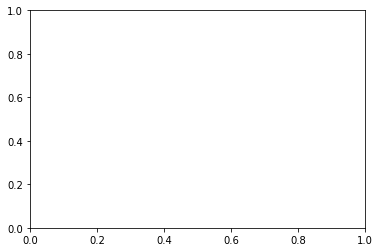

In [288]:
plt.plot(rho_d, s.temperatures[:6], '--o',  color='blue')
plt.plot(rho_c, s.temperatures[:6], '--o',  color='blue')
exp_data = np.genfromtxt('/home/adria/documents/fus.txt', delimiter=',')
plt.plot(exp_data[:,0], exp_data[:,1]*344.4, '--o', color='tab:orange')

## HMD NPT RESULTS

In [ ]:
s = hmd.HMD(md_dir='/home/adria/irb/hoomd/FUS_NPT', equil_frames=500)
rho_d, rho_c = s.phase_diagram()

## LMP RESULTS

In [ ]:
fus = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/dignon/FUS_TEST')

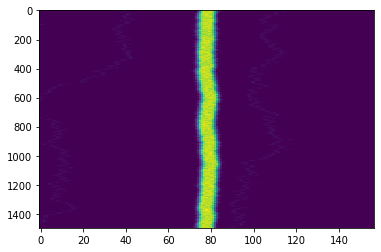

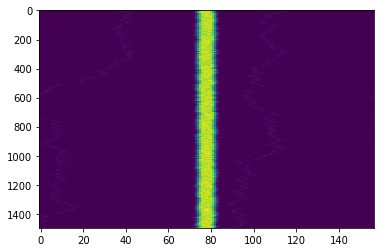

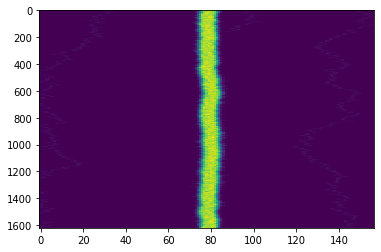

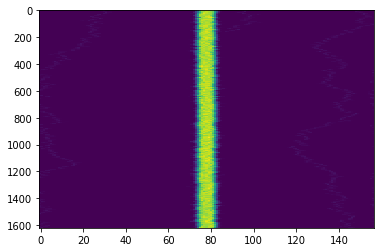

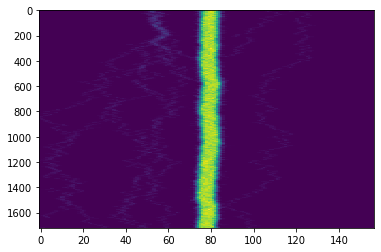

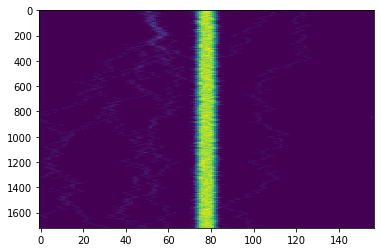

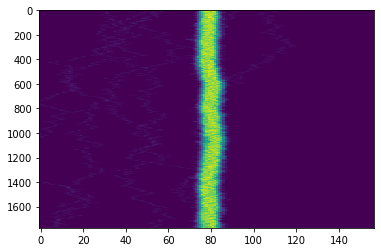

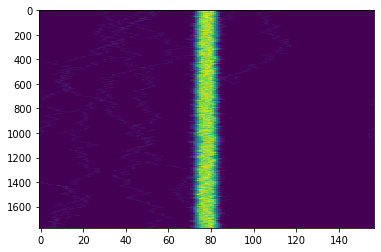

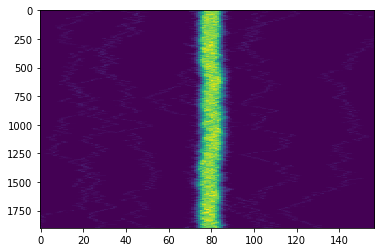

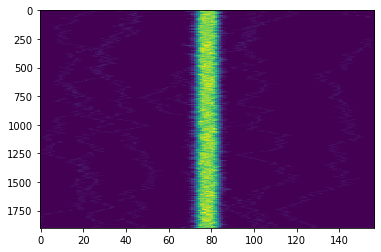

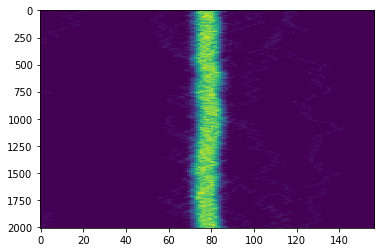

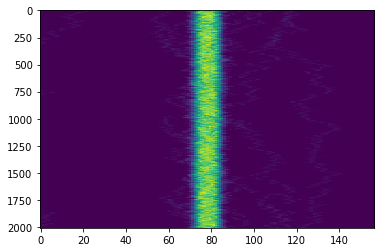

In [193]:
rho_d, rho_c = fus.phase_diagram()

# plt.plot(rho_c, fus.temperatures, '--o', color='blue')
# plt.plot(rho_d, fus.temperatures, '--o', color='blue')
# exp_data = np.genfromtxt('/home/adria/documents/fus.txt', delimiter=',')
# plt.plot(exp_data[:,0], exp_data[:,1]*344.4, '--', color='tab:orange')

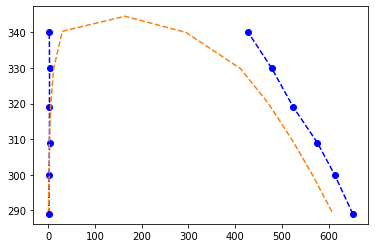

In [194]:

plt.plot(rho_c, fus.temperatures, '--o', color='blue')
plt.plot(rho_d, fus.temperatures, '--o', color='blue')
exp_data = np.genfromtxt('/home/adria/documents/fus.txt', delimiter=',')
plt.plot(exp_data[:,0], exp_data[:,1]*344.4, '--', color='tab:orange')

In [220]:
len('MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTDTSGYGQSSYSSYGQSQNTGYGTQSTPQGYGSTGGYGSSQSSQSSYGQQSSYPGYGQQPAPSSTSGSYGSSSQSSSYGQPQSGSYSQQPSYGGQQQSYGQQQSYNPPQGYGQQNQYNS')

163

In [221]:
len('MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTDTSGYGQSSYSSYGQSQNTGYGTQSTPQGYGSTGGYGSSQSSQSSYGQQSSYPGYGQQPAPSSTSGSYGSSSQSSSYGQPQSGSYSQQPSYGGQQQSYGQQQSYNPPQGYGQQNQYNS')

163

In [4]:
plot_data = [
[0, 0.8412596401028278],
[0, 0.8714652956298201],
[0, 0.8997429305912596],
[1.4925373134328765, 0.9286632390745502],
[8.95522388059706, 0.9582262210796915],
[26.865671641791067, 0.9877892030848329],
]

temperatures_FUS = np.array(plot_data)[:,1]*344.4
print(temperatures_FUS)
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/FUS_TEST2',
                      host=f'@perdiu31',
                      protein='FUS',
                      chains=100, 
                      model='HPS',
                      save=50000,
                      t=int(1e9),
                      slab=True,
                      use_random=True,
                      processors=4,
                      temperatures=temperatures_FUS,
                      debye=0.1).write_hps_files()

[289.72982005 300.13264781 309.8714653  319.83161954 330.01311054
 340.19460154]
╔═════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/FUS_TEST2 for FUS     ║
║-----------------------------------------------------------------------------------------║
║   PARAMETERS                                                                            ║
║       - Model = HPS                                                                     ║
║       - Chains = 100                                                                    ║
║       - Ionic Strength (mM) = 0.1                                                       ║
║       - Medium Permittivity = 80.0                                                      ║
║       - Temperatures (K) = [289.72982005 300.13264781 309.8714653  319.83161954 330.01311054
 340.19460154]    ║
║       - HPS Scale = 1.0                                           

### 4. Secondary structure on CPEB4 <a id='4'></a>

Start from a non helical CPEB4 and then add the helicity !

In [59]:
seq = 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'

In [63]:
nexp = seq[378:393]
nexp

'RTFDMHSLESSLIDI'

In [53]:
lmpsetup.LMPSetup(oliba_wd='/home/adria/test/CPEB4_alpha',
                  protein='CPEB4',
                  time=(1e7),
                  save=50000, 
                  temperatures=[300],
                  debye=0.1).write_hps_files(qsub=False)

╔═══════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/test/CPEB4_alpha for CPEB4     ║
║-----------------------------------------------------------------------║
║   PARAMETERS                                                          ║
║       - Model = HPS                                                   ║
║       - Chains = 1                                                    ║
║       - Ionic Strength (mM) = 0.1                                     ║
║       - Medium Permittivity = 80.0                                    ║
║       - Temperatures (K) = [300]                                      ║
║       - HPS Scale = 1.0                                               ║
╚═══════════════════════════════════════════════════════════════════════╝


In [121]:
coords = np.zeros(shape=(448,3))
d = np.arange(0, 378*3.8, 3.8)
coords[:d.shape[0],0] = d


In [122]:
alpha_coords = md.load_pdb('/home/adria/test/CPEB4_alpha/ca_nexp.pdb').xyz*10.
alpha_coords=alpha_coords+[+1463.5980011+3.8,-81.949,-22.581999]

In [123]:
coords[378:393,:] = alpha_coords

In [124]:
alpha_coords

array([[[ 1.43640000e+03, -2.50244140e-06, -1.74926758e-07],
        [ 1.43767800e+03, -3.46899664e+00, -8.92000373e-01],
        [ 1.43746900e+03, -4.70700323e+00,  2.70500166e+00],
        [ 1.43419000e+03, -2.91399634e+00,  3.42100126e+00],
        [ 1.43200300e+03, -5.69999945e+00,  4.79599935e+00],
        [ 1.42884700e+03, -3.60399878e+00,  5.19000036e+00],
        [ 1.42722600e+03, -5.74199927e+00,  2.49500066e+00],
        [ 1.42763100e+03, -8.74599707e+00,  4.80500013e+00],
        [ 1.42618200e+03, -6.78800452e+00,  7.73300153e+00],
        [ 1.42305200e+03, -5.68200171e+00,  5.87400037e+00],
        [ 1.42238500e+03, -9.21000159e+00,  4.64200002e+00],
        [ 1.42282101e+03, -1.05560023e+01,  8.16200048e+00],
        [ 1.42060200e+03, -7.94199622e+00,  9.81900198e+00],
        [ 1.41797900e+03, -8.68699896e+00,  7.15900213e+00],
        [ 1.41762200e+03, -1.21610056e+01,  8.69199926e+00]]])

In [128]:
s = md.load_pdb('/home/adria/test/CPEB4_alpha/topo.pdb')
s.xyz = coords/10.
s.save_pdb('/home/adria/test/CPEB4_alpha/topo_test.pdb')

We made some equilibration and so we save the results :

In [6]:
t = md.load('/home/adria/test/CPEB4_alpha/atom_traj_0.lammpstrj', top='/home/adria/test/CPEB4_alpha/topo.pdb')

In [7]:
t[-1].save_pdb('/home/adria/CPEB4_alpha.pdb')

Let's test it !

In [43]:
temperatures = np.linspace(300,450,6)
test_alpha = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4_alpha_slab',
                               debye=0.1,
                               temperatures=temperatures,
                               model='HPS',
                               save=50000,
                               host='@perdiu31',
                               chains=1,
                               protein='CPEB4_alpha',
                               fix_region=[379,393],
                               t=int(1e9)).write_hps_files(qsub=True)

╔════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/CPEB4_alpha_slab for CPEB4_alpha     ║
║--------------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                           ║
║       - Model = HPS                                                                                    ║
║       - Chains = 1                                                                                     ║
║       - Ionic Strength (mM) = 0.1                                                                      ║
║       - Medium Permittivity = 80.0                                                                     ║
║       - Temperatures (K) = [300. 330. 360. 390. 420. 450.]                                             ║
║       - HPS Scale = 1.0            

### 5. HPS TEST <a id='5'></a>

In [4]:
prots = ['CspTm', 'Integrase', 'ProTa-N', 
         'ProTa-C', 'R15', 'R17', 
         'hCyp', 'Protein-L', 'ACTR', 
         'hNHE1cdt', 'sNase', 'ASYN']
hosts = ["@perdiu29"]*6+["@perdiu27"]*6
Is = np.array([42,50,42,42,128,128,85,128,199,199,17,156])*10**-3
for i in range(len(prots)):
    print(f"DOING {prots[i]}")
    lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/HPS_TEST/{i}.{prots[i]}',
                     temperatures=[298],
                     ionic_strength=Is[i],
                     protein=prots[i],
                     model='HPS',
                     t=int(1e9),
                     processors=2,
                     host=hosts[i],
                     chains=1,
                     save=50000).write_hps_files(qsub=True, silent=True)

DOING CspTm
DOING Integrase
DOING ProTa-N
DOING ProTa-C
DOING R15
DOING R17
DOING hCyp
DOING Protein-L
DOING ACTR
DOING hNHE1cdt
DOING sNase
DOING ASYN


In [333]:
rgs = []
for i, prot in enumerate(prots):
    wr = lmp.LMP(md_dir=f'/home/adria/perdiux/prod/lammps/dignon/HPS_TEST/{i}.{prot}', equil_frames=1000)
    rgs.append(wr.rg()[0]) 
    print(prot, rgs[-1])

> Run Completed at 11.48% for CspTm. Ran 114800000 steps for a total of 2297 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
CspTm [17.20590439]
> Run Completed at 15.01% for Integrase. Ran 150100000 steps for a total of 3003 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
Integrase [17.71345894]
> Run Completed at 8.96% for ProTa-N. Ran 89650000 steps for a total of 1794 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
ProTa-N [44.38020935]
> Run Completed at 6.33% for ProTa-C. Ran 63300000 steps for a total of 1267 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
ProTa-C [36.65408917]
> Run Completed at 6.36% for R15. Ran 63600000 steps for a total of 1273 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
R15 [22.7556851]
> Run Completed at 6.68% for R17. Ran 66750000 steps for a total of 1336 frames 
> Taking frames every 1 

In [11]:
lmpsetup.LMPSetup(oliba_wd='/home/adria/test/slab_bench',
                  protein='CPEB4', 
                  chains=50,
                 save=1000,
                  use_random=True,
                  slab=True,
                  temperatures=[300],
                 t=int(1e7)).write_hps_files(qsub=False)

╔══════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/test/slab_bench for CPEB4     ║
║----------------------------------------------------------------------║
║   PARAMETERS                                                         ║
║       - Model = HPS                                                  ║
║       - Chains = 50                                                  ║
║       - Ionic Strength (mM) = 0.1                                    ║
║       - Medium Permittivity = 80.0                                   ║
║       - Temperatures (K) = [300]                                     ║
║       - HPS Scale = 1.0                                              ║
╚══════════════════════════════════════════════════════════════════════╝


In [8]:
t = lmp.LMP(md_dir='/home/adria/test/slab_bench')

ValueError: zero-size array to reduction operation minimum which has no identity

0.016
KH_KH


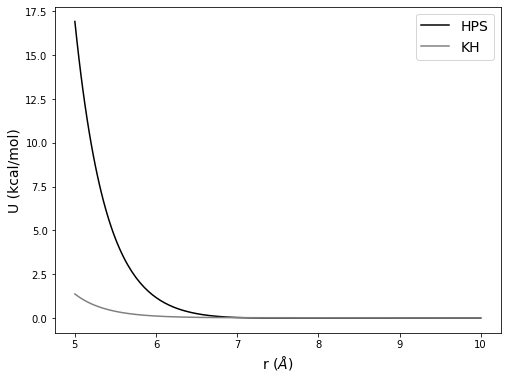

In [41]:
s = lmp.LMP(md_dir=None)

plt.figure(figsize=(8,6))
r, u_hps = s.pair_potential(aminoacid='R')
r, u_kh = s.pair_potential(aminoacid='R', model='KH')
plt.plot(r,u_hps, label='HPS', color='black')
plt.plot(r,u_kh, label='KH', color='grey')
plt.xlabel("r ($\AA$)", fontsize=14)
plt.ylabel("U (kcal/mol)", fontsize=14)
plt.legend(fontsize=14)

0.016
KH_KH


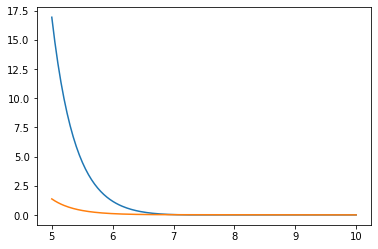

In [35]:
s = lmp.LMP(md_dir=None)

r, u_hps = s.pair_potential(aminoacid='R')
r, u_kh = s.pair_potential(aminoacid='R', model='KH')
plt.plot(r,u_hps, label='HPS')
plt.plot(r,u_kh, label='KH')